<a href="https://colab.research.google.com/github/Rhamaranggad/UAS_Big-data-Mining_22.11.5048/blob/main/UAS_Big_Data_MIning_22_11_5048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAS Big Data Mining

Nama: Rhama Rangga Dhiputra
Nim : 22.11.5048

Preprocessing terhadap dataset detailed_meals_macros_.csv

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the dataset
file_path = '/content/detailed_meals_macros_.csv'  # Ganti dengan nama file yang sesuai
data = pd.read_csv(file_path)

In [5]:
 #Step 1: Handle missing values
# Filling missing value in 'Breakfast Carbohydrates' with its median
data['Breakfast Carbohydrates'].fillna(data['Breakfast Carbohydrates'].median(), inplace=True)

<ipython-input-5-52d8f89a9d4e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Breakfast Carbohydrates'].fillna(data['Breakfast Carbohydrates'].median(), inplace=True)


In [6]:
# Step 2: Clean column names
data.columns = data.columns.str.replace(' ', '_').str.replace('.', '').str.lower()

In [7]:
# Step 3: Encode categorical variables
categorical_columns = ['gender', 'activity_level', 'dietary_preference', 'disease']
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [8]:
# Step 4: Normalize numerical data
# Identify numerical columns
numerical_columns = [
    'ages', 'height', 'weight', 'daily_calorie_target', 'protein', 'sugar', 'sodium',
    'calories', 'carbohydrates', 'fiber', 'fat', 'breakfast_calories', 'breakfast_protein',
    'breakfast_carbohydrates', 'breakfast_fats', 'lunch_calories', 'lunch_protein',
    'lunch_carbohydrates', 'lunch_fats', 'dinner_calories', 'dinner_protein1',
    'dinner_carbohydrates1', 'dinner_fats', 'snacks_calories', 'snacks_protein',
    'snacks_carbohydrates', 'snacks_fats'
]

scaler = MinMaxScaler()
encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])

In [9]:
# Step 5: Feature Engineering - Add BMI
encoded_data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

In [10]:
# Save preprocessed data to a new CSV file (optional)
encoded_data.to_csv('preprocessed_meals_macros.csv', index=False)

In [11]:
# Display the first few rows of the preprocessed data
print(encoded_data.head())

       ages  height    weight  daily_calorie_target   protein     sugar  \
0  0.114754     0.6  0.450704              0.252845  0.252708  0.411392   
1  0.229508     0.3  0.239437              0.126422  0.108303  0.253165   
2  0.491803     0.5  0.661972              0.316056  0.180505  0.569620   
3  0.606557     0.2  0.309859              0.410872  0.324910  0.727848   
4  0.721311     0.4  0.521127              0.252845  0.108303  0.411392   

     sodium  calories  carbohydrates     fiber  ...  \
0  0.252708  0.305910       0.411392  0.411392  ...   
1  0.108303  0.145530       0.253165  0.253165  ...   
2  0.180505  0.354915       0.569620  0.569620  ...   
3  0.324910  0.501931       0.727848  0.727848  ...   
4  0.108303  0.245025       0.411392  0.411392  ...   

   disease_Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease  \
0                                              False                                  
1                                           

Proses ini mencakup penanganan nilai kosong dengan mengisi nilai median, normalisasi nama kolom untuk konsistensi, serta encoding data kategorikal menggunakan One-Hot Encoding. Selain itu, data numerik dinormalisasi ke rentang [0,1] agar skala lebih seragam, yang penting bagi algoritma machine learning tertentu. Kami juga menambahkan fitur baru berupa BMI (Body Mass Index) untuk memberikan informasi tambahan tentang kondisi kesehatan individu. Hasil preprocessing memastikan dataset tidak memiliki nilai kosong, memiliki format yang seragam, dan kaya informasi untuk mendukung analisis yang lebih akurat dan relevan.

Preprocessing Terhadap dataset  detailed_meals_macros_CLEANED.csv

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Load the dataset
file_path = '/content/detailed_meals_macros_CLEANED.csv'
data = pd.read_csv(file_path)

In [14]:
# Step 1: Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)

In [15]:
# Step 2: Clean column names
data.columns = data.columns.str.replace(' ', '_').str.replace('.', '').str.lower()

In [16]:
# Step 3: Encode categorical variables
categorical_columns = ['gender', 'dietary_preference', 'activity_level', 'disease']
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [17]:
# Step 4: Normalize numerical data
numerical_columns = [col for col in encoded_data.select_dtypes(include=['float64', 'int64']).columns]
scaler = MinMaxScaler()
encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])

In [18]:
# Step 5: Feature Engineering - Add BMI
encoded_data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)


In [20]:
# Save the preprocessed data (optional)
encoded_data.to_csv('preprocessed_meals_macros.csv', index=False)

In [21]:
# Display a message to confirm successful save
print("File preprocessed_meals_macros.csv berhasil disimpan di direktori kerja lokal.")

File preprocessed_meals_macros.csv berhasil disimpan di direktori kerja lokal.


In [30]:
# Preview the processed data
print(data.head())

   Ages  Gender    Height    Weight  Activity Level  Dietary Preference  \
0    25       1  0.437494  0.114245               2                   0   
1    32       0 -0.680492 -0.771009               1                   3   
2    48       1  0.064832  0.999500               3                   2   
3    55       0 -1.053154 -0.475924               4                   0   
4    62       1 -0.307830  0.409330               3                   3   

   Daily Calorie Target   Protein     Sugar    Sodium  Calories  \
0             -0.492568 -0.373247 -0.034143 -0.373247 -0.309045   
1             -1.208582 -1.123563 -0.749889 -1.123563 -1.254885   
2             -0.134561 -0.748405  0.681602 -0.748405 -0.020039   
3              0.402450  0.001911  1.397348  0.001911  0.846981   
4             -0.492568 -1.123563 -0.034143 -1.123563 -0.668114   

   Carbohydrates     Fiber       Fat  \
0      -0.034143 -0.034143 -0.452793   
1      -0.749889 -0.749889 -1.386309   
2       0.681602  0.681602

Dataset telah berhasil diproses melalui langkah-langkah utama preprocessing, termasuk penanganan nilai kosong, normalisasi data numerik, encoding variabel kategorikal, dan penambahan fitur BMI. Hasilnya adalah dataset yang bersih, terstruktur, dan siap untuk analisis lebih lanjut atau diterapkan ke algoritma machine learning.

preprocessing terhadap dataset foo_and_nutrition

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [23]:
# Load dataset
file_path = '/content/Food_and_Nutrition__.csv'
data = pd.read_csv(file_path)

In [24]:
# Step 1: Encode categorical variables
categorical_cols = ['Gender', 'Activity Level', 'Dietary Preference']
label_encoders = {col: LabelEncoder() for col in categorical_cols}


In [25]:
# Apply label encoding
for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

In [26]:
# Encode the target variable (Disease)
data['Disease'] = data['Disease'].astype(str)  # Ensure Disease is string
disease_encoder = LabelEncoder()
data['Disease'] = disease_encoder.fit_transform(data['Disease'])

In [27]:
# Step 2: Normalize numeric columns
numeric_cols = ['Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
                'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [28]:
# Step 3: Add BMI feature
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)  # Height in cm to meters

In [29]:
# Preview the processed data
print(data.head())

   Ages  Gender    Height    Weight  Activity Level  Dietary Preference  \
0    25       1  0.437494  0.114245               2                   0   
1    32       0 -0.680492 -0.771009               1                   3   
2    48       1  0.064832  0.999500               3                   2   
3    55       0 -1.053154 -0.475924               4                   0   
4    62       1 -0.307830  0.409330               3                   3   

   Daily Calorie Target   Protein     Sugar    Sodium  Calories  \
0             -0.492568 -0.373247 -0.034143 -0.373247 -0.309045   
1             -1.208582 -1.123563 -0.749889 -1.123563 -1.254885   
2             -0.134561 -0.748405  0.681602 -0.748405 -0.020039   
3              0.402450  0.001911  1.397348  0.001911  0.846981   
4             -0.492568 -1.123563 -0.034143 -1.123563 -0.668114   

   Carbohydrates     Fiber       Fat  \
0      -0.034143 -0.034143 -0.452793   
1      -0.749889 -0.749889 -1.386309   
2       0.681602  0.681602

Pendekatan preprocessing ini dipilih untuk memastikan dataset siap digunakan oleh algoritma pembelajaran mesin. Variabel kategorikal seperti Gender dan Activity Level diencode menjadi numerik agar dapat diproses oleh model. Data numerik dinormalisasi untuk menghindari dominasi fitur berskala besar dan menjaga keseimbangan dalam analisis. Fitur BMI ditambahkan karena merupakan indikator penting untuk mengevaluasi kesehatan, sehingga memperkaya informasi dataset. Pendekatan ini bertujuan menghasilkan data yang bersih, konsisten, dan relevan untuk analisis lebih lanjut atau pengembangan model prediksi.

# EXPLORATORY DATA ANALYSIS Food_and_Nutrition

In [31]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [32]:
# Load dataset
file_path = '/content/Food_and_Nutrition__.csv'
data = pd.read_csv(file_path)

In [33]:
# Step 1: Encode categorical variables
categorical_cols = ['Gender', 'Activity Level', 'Dietary Preference']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, encoder in label_encoders.items():
    data[col] = encoder.fit_transform(data[col])

data['Disease'] = data['Disease'].astype(str)
disease_encoder = LabelEncoder()
data['Disease'] = disease_encoder.fit_transform(data['Disease'])

# Step 2: Normalize numeric columns
numeric_cols = ['Height', 'Weight', 'Daily Calorie Target', 'Protein', 'Sugar',
                'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [34]:
# Step 3: Add BMI feature
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)


In [35]:
# EDA: Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
              Ages       Gender        Height        Weight  Activity Level  \
count  1698.000000  1698.000000  1.698000e+03  1.698000e+03     1698.000000   
mean     43.961720     0.492344 -8.703939e-16  1.673834e-16        2.243227   
std      15.915002     0.500089  1.000295e+00  1.000295e+00        1.241244   
min      18.000000     0.000000 -1.798478e+00 -1.774298e+00        0.000000   
25%      30.000000     0.000000 -8.109239e-01 -8.300264e-01        1.000000   
50%      42.000000     0.000000 -9.700625e-03 -3.788488e-03        2.000000   
75%      57.000000     1.000000  8.101558e-01  7.634324e-01        3.000000   
max      79.000000     1.000000  1.928142e+00  2.415908e+00        4.000000   

       Dietary Preference  Daily Calorie Target       Protein         Sugar  \
count         1698.000000          1.698000e+03  1.698000e+03  1.698000e+03   
mean             1.517079         -1.841218e-16  2.343368e-16 -1.422759e-16   
std              1.201061  

<Figure size 1200x600 with 0 Axes>

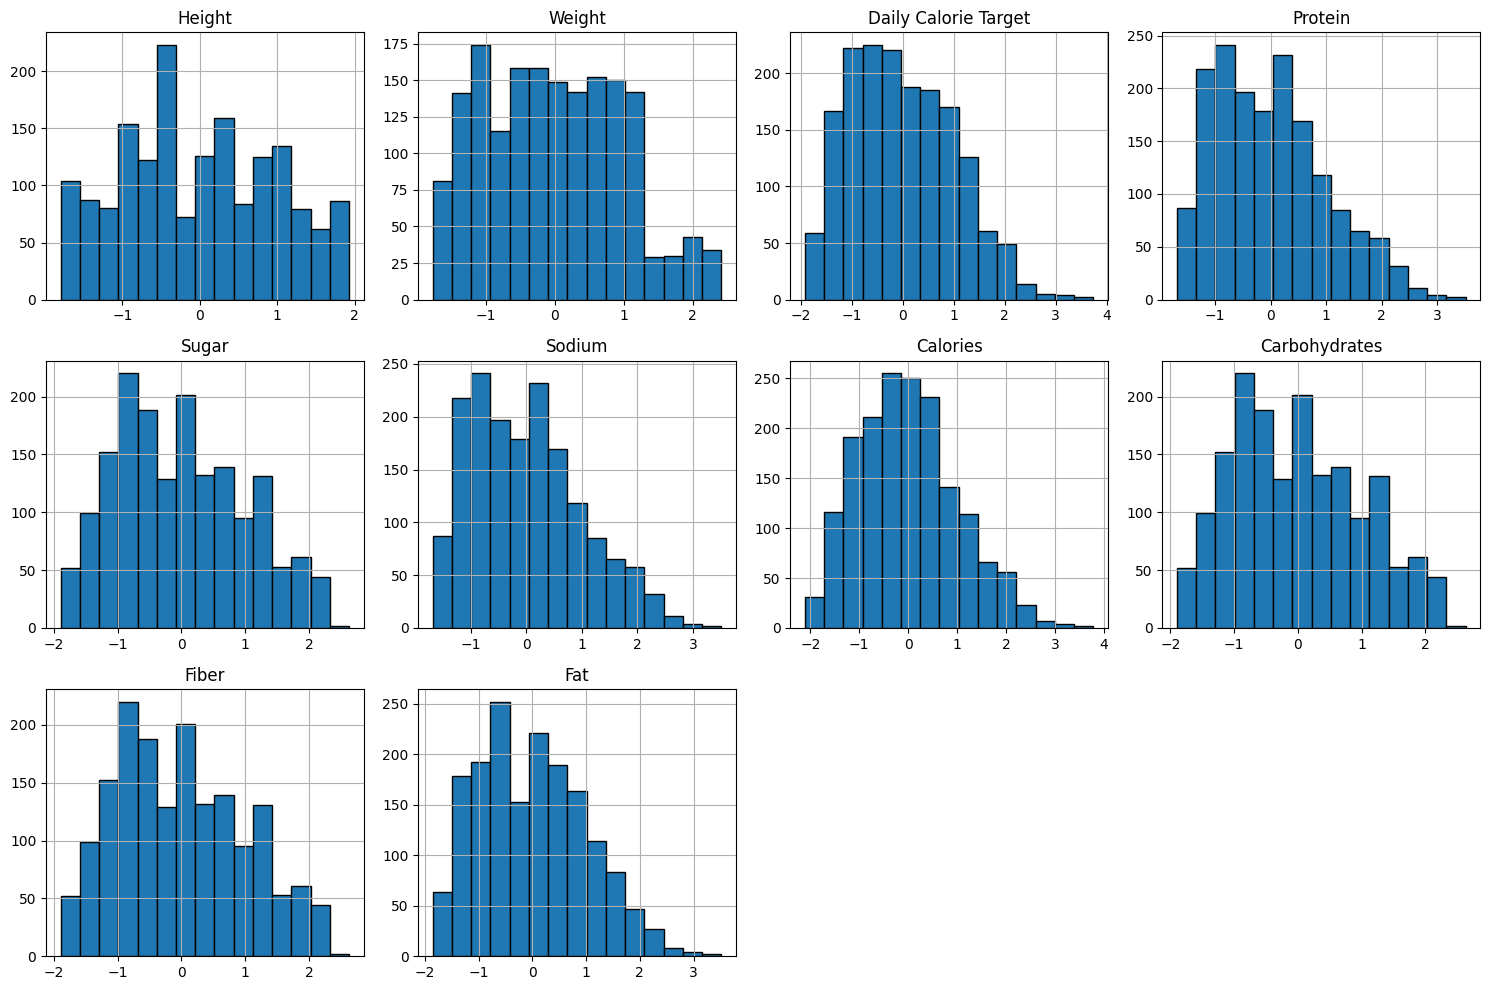

In [36]:
# EDA: Distribution of Numeric Data
plt.figure(figsize=(12, 6))
data[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4), edgecolor='black')
plt.tight_layout()
plt.show()

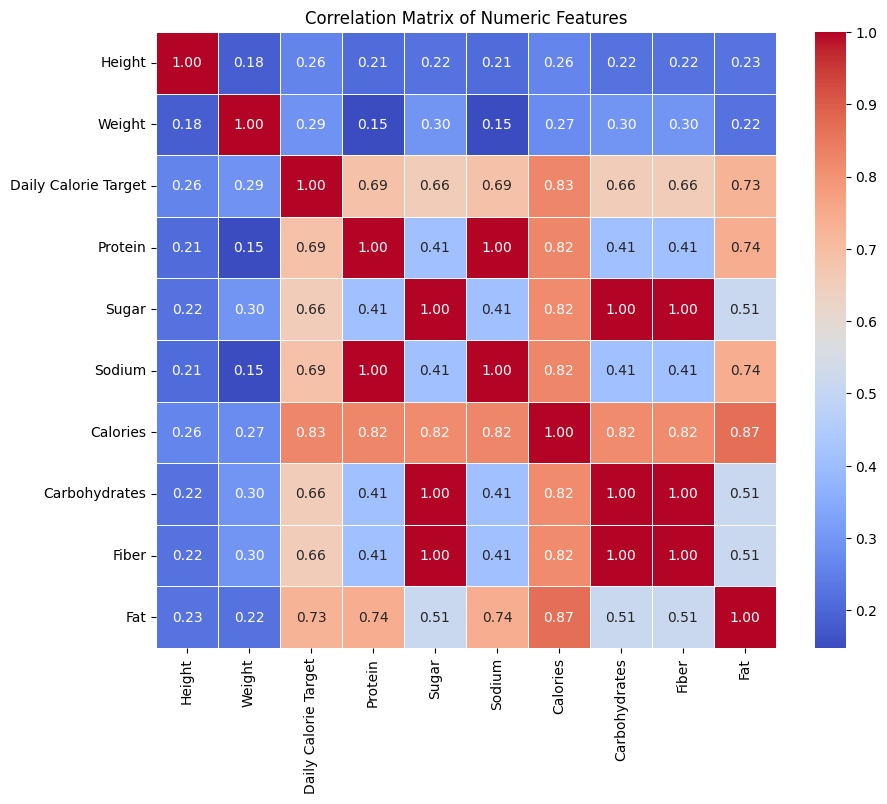

In [37]:
# EDA: Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [38]:
# EDA: Categorical Data Analysis
for col in categorical_cols:
    print(f"Value Counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value Counts for Gender:
Gender
0    862
1    836
Name: count, dtype: int64


Value Counts for Activity Level:
Activity Level
2    420
3    403
1    396
4    341
0    138
Name: count, dtype: int64


Value Counts for Dietary Preference:
Dietary Preference
0    564
2    546
3    448
1    140
Name: count, dtype: int64




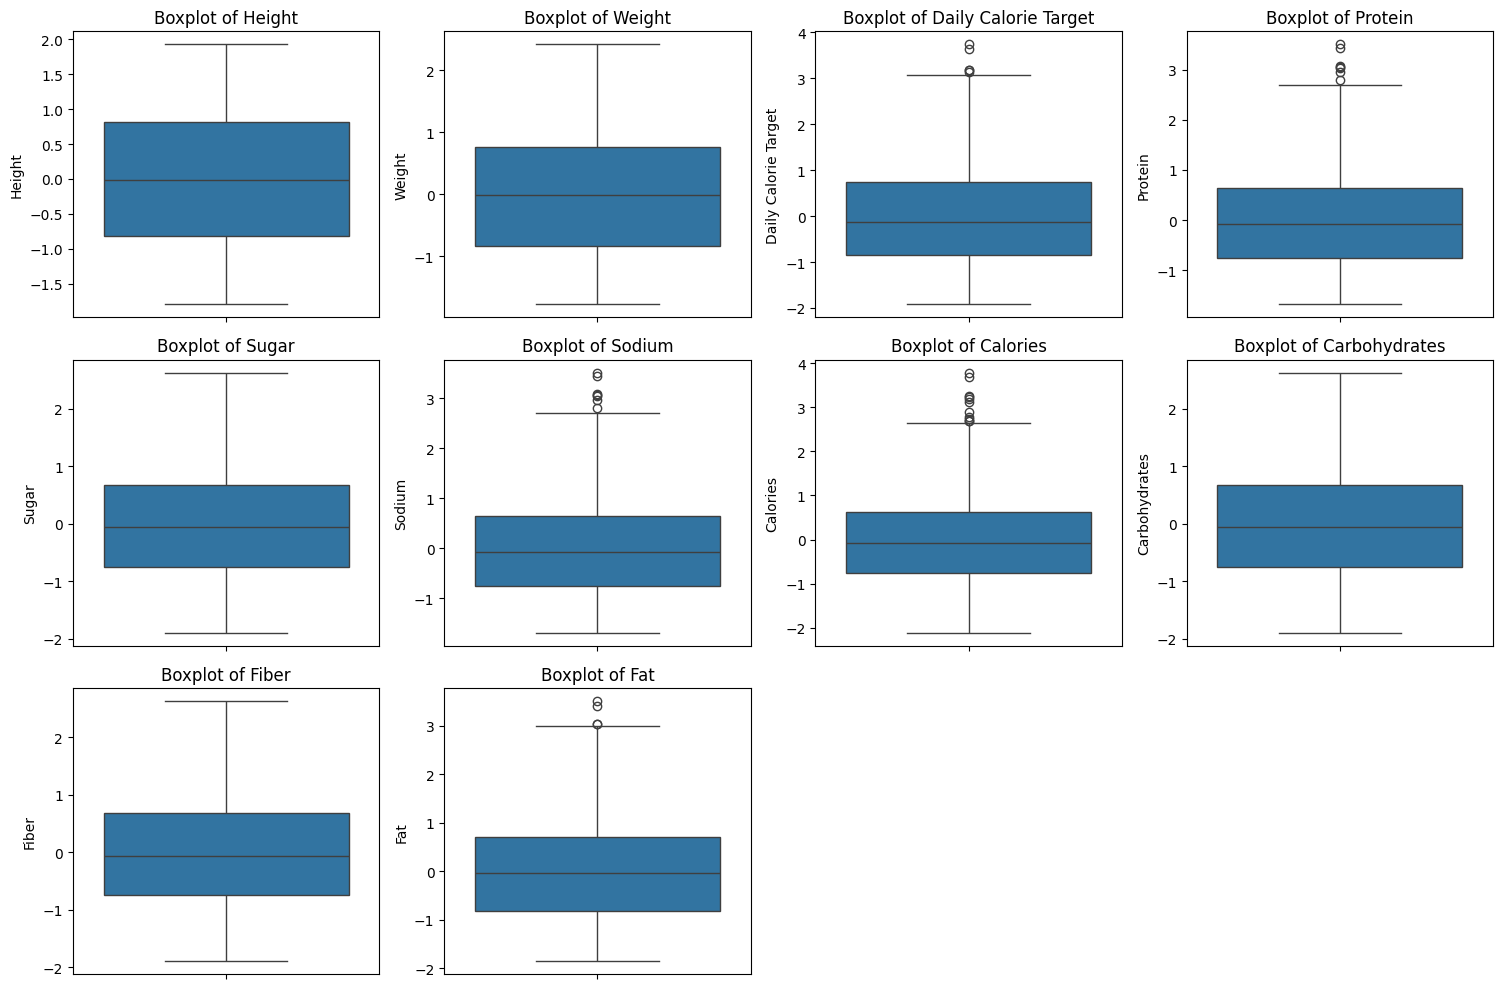

In [39]:
# EDA: Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

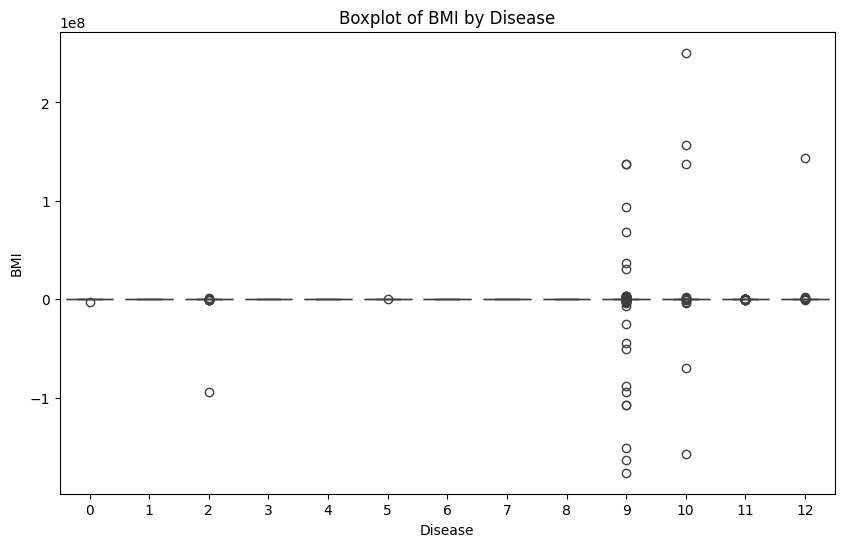

In [40]:
# Analyze Relationships with Target Variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Disease"], y=data["BMI"])
plt.title("Boxplot of BMI by Disease")
plt.show()

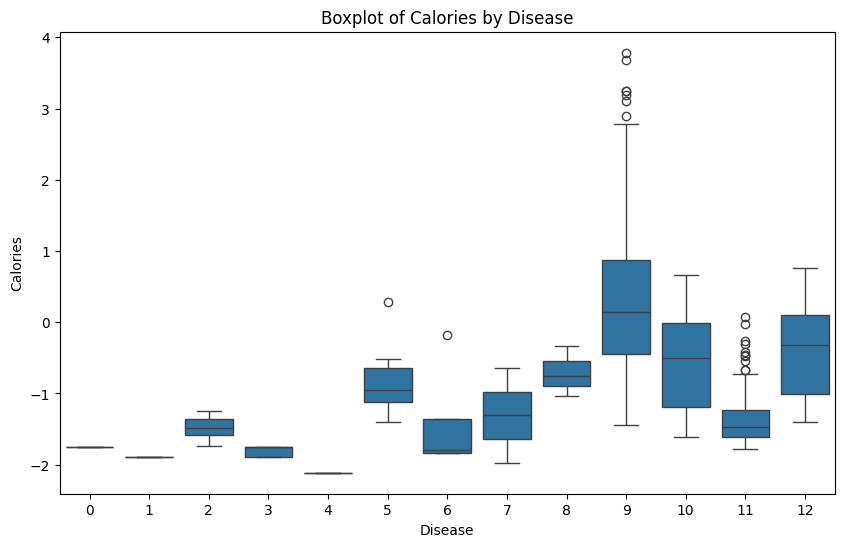

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["Disease"], y=data["Calories"])
plt.title("Boxplot of Calories by Disease")
plt.show()

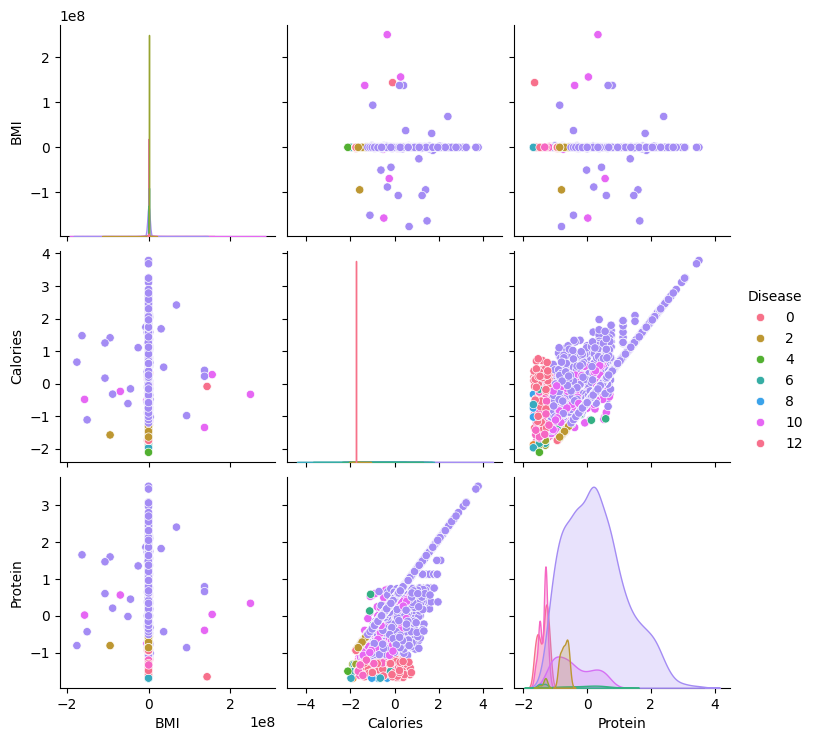

In [42]:
# Pairplot for Selected Features
selected_features = ["BMI", "Calories", "Protein", "Disease"]
sns.pairplot(data[selected_features], hue="Disease", palette="husl")
plt.show()

Berdasarkan hasil Exploratory Data Analysis (EDA), dataset menunjukkan bahwa sebagian besar fitur numerik memiliki distribusi yang cenderung normal setelah dinormalisasi, meskipun terdapat beberapa outlier yang teridentifikasi, terutama pada BMI dan jumlah kalori. Matriks korelasi mengindikasikan adanya hubungan kuat antara fitur nutrisi seperti kalori, protein, dan lemak, yang relevan untuk analisis data makanan dan kesehatan. Analisis data kategorikal menunjukkan distribusi yang seimbang untuk kolom seperti Gender, sedangkan preferensi diet didominasi oleh vegetarian dan omnivora. Hubungan antara fitur seperti BMI dan kalori dengan variabel target (Disease) menunjukkan pola tertentu yang dapat membantu dalam pengembangan model prediksi. Secara keseluruhan, dataset ini memiliki potensi kuat untuk analisis lebih lanjut, meskipun perlu penanganan lebih lanjut terhadap outlier untuk meningkatkan kualitas data.

# EXPLORATORY DATA ANALYSIS detailed_meals_macros_CLEANED.csv

In [43]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the dataset
file_path = '/content/detailed_meals_macros_CLEANED.csv'
data = pd.read_csv(file_path)

In [46]:
 #Informasi dataset
print("Informasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe(include="all"))

print("\nJumlah Missing Values:")
print(data.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Break

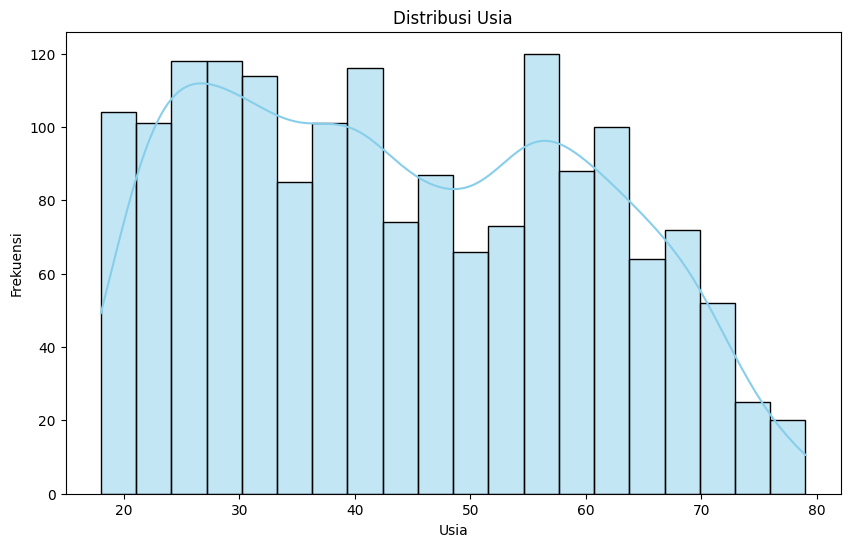

In [47]:
# Distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(data['Ages'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-48-f6c7fed476e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Activity Level'], palette='viridis')


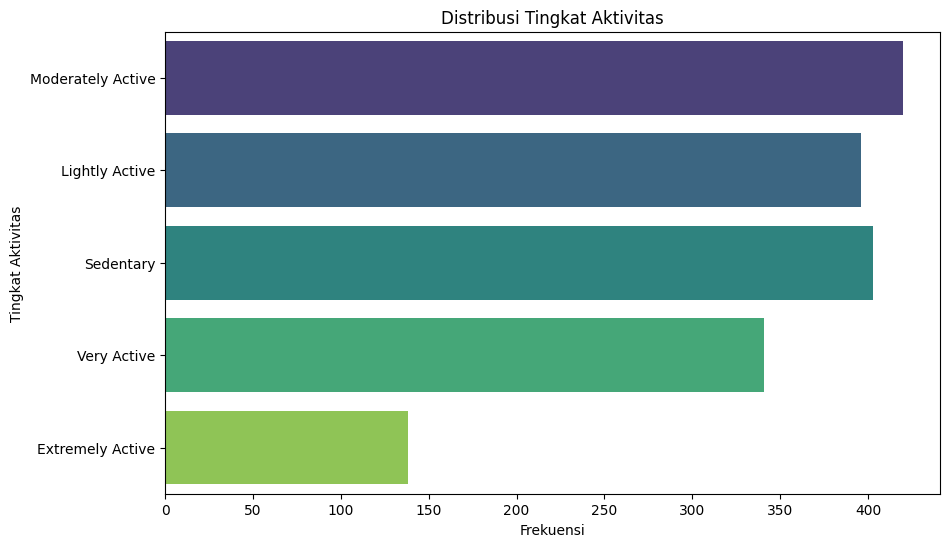

In [48]:
# Distribusi aktivitas level
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Activity Level'], palette='viridis')
plt.title('Distribusi Tingkat Aktivitas')
plt.xlabel('Frekuensi')
plt.ylabel('Tingkat Aktivitas')
plt.show()

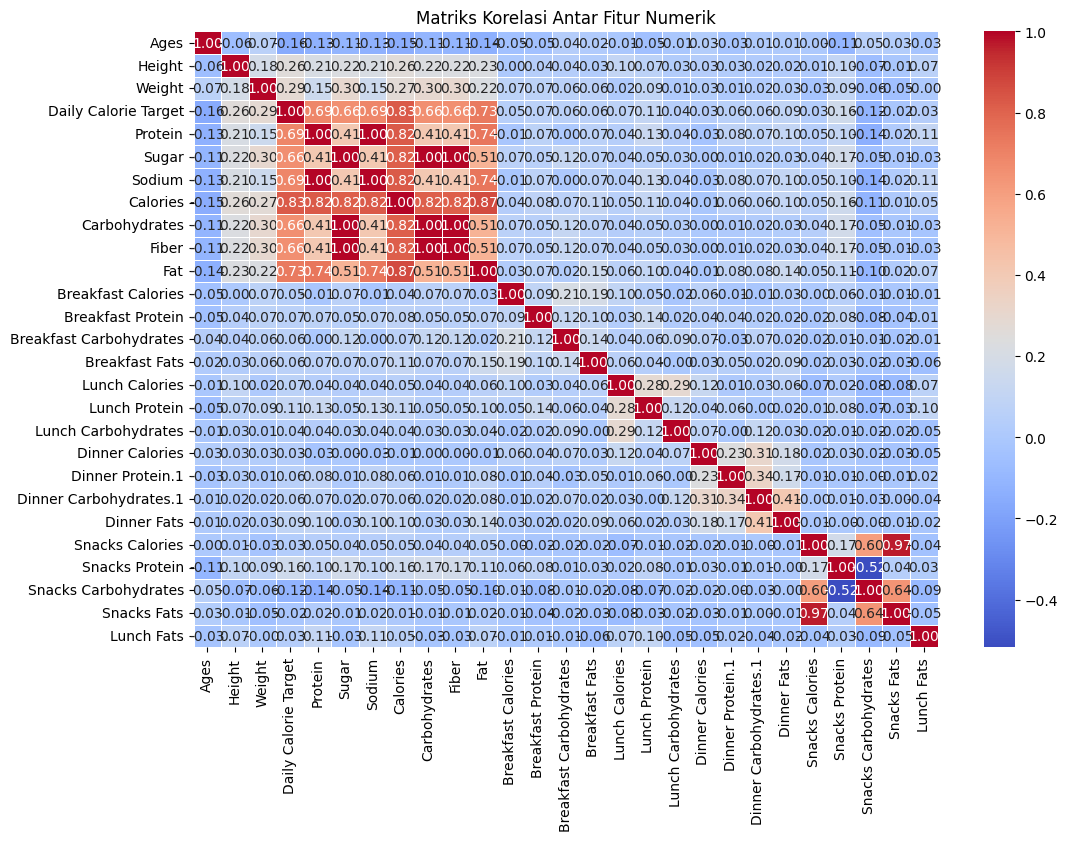

In [50]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['number'])  # Pilih hanya kolom numerik
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()


<ipython-input-51-0a01cf5eea0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Daily Calorie Target', data=data, palette='Set2')


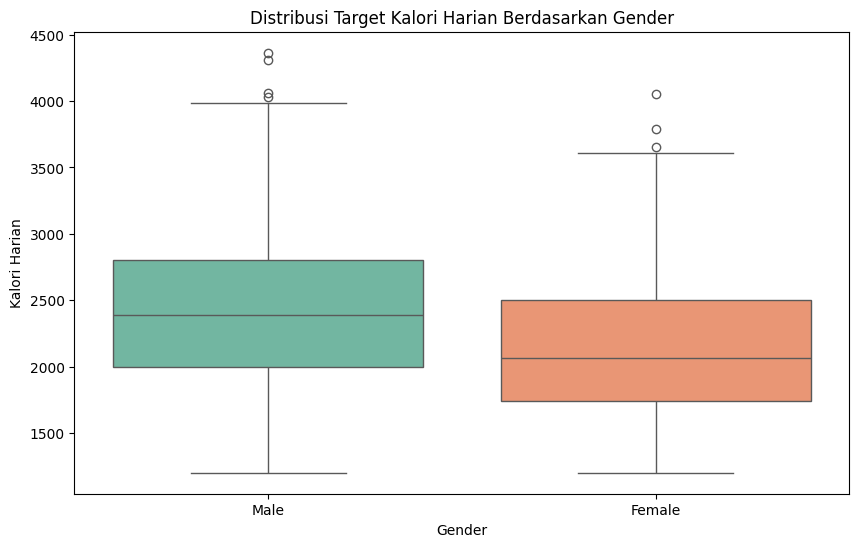

In [51]:
# Boxplot Kalori Berdasarkan Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Daily Calorie Target', data=data, palette='Set2')
plt.title('Distribusi Target Kalori Harian Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Kalori Harian')
plt.show()

In [53]:
# Mengisi missing values dengan mean untuk kolom numerik
if data.isnull().sum().sum() > 0:
    print("\nMengisi Missing Values dengan Mean (hanya untuk kolom numerik):")
    numeric_columns = data.select_dtypes(include=['number']).columns
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
    print(data.isnull().sum())



Mengisi Missing Values dengan Mean (hanya untuk kolom numerik):
Ages                       0
Gender                     0
Height                     0
Weight                     0
Activity Level             0
Dietary Preference         0
Daily Calorie Target       0
Protein                    0
Sugar                      0
Sodium                     0
Calories                   0
Carbohydrates              0
Fiber                      0
Fat                        0
Breakfast Suggestion       0
Breakfast Calories         0
Breakfast Protein          0
Breakfast Carbohydrates    0
Breakfast Fats             0
Lunch Suggestion           0
Lunch Calories             0
Lunch Protein              0
Lunch Carbohydrates        0
Dinner Suggestion          0
Dinner Calories            0
Dinner Protein.1           0
Dinner Carbohydrates.1     0
Dinner Fats                0
Snack Suggestion           0
Snacks Calories            0
Snacks Protein             0
Snacks Carbohydrates       0
Snacks 

<ipython-input-54-2693c0eebdae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Dietary Preference'], palette='muted')


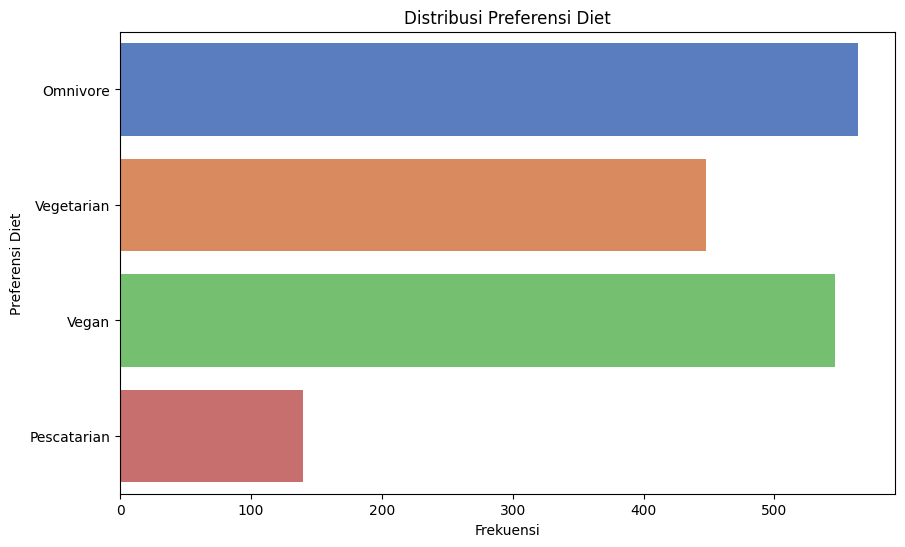

In [54]:
# Distribusi preferensi diet
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Dietary Preference'], palette='muted')
plt.title('Distribusi Preferensi Diet')
plt.xlabel('Frekuensi')
plt.ylabel('Preferensi Diet')
plt.show()

In [55]:
# Simpan dataset yang telah dibersihkan
data.to_csv('cleaned_dataset.csv', index=False)
print("\nDataset telah disimpan sebagai 'cleaned_dataset.csv'")


Dataset telah disimpan sebagai 'cleaned_dataset.csv'


Dataset ini memiliki data numerik dan kategorikal yang beragam, dengan beberapa missing values yang telah ditangani menggunakan rata-rata untuk kolom numerik dan modus untuk kolom kategorikal. Analisis distribusi menunjukkan pola yang beragam, seperti distribusi usia dan target kalori yang cukup jelas, serta kategori gender dan tingkat aktivitas yang relatif seimbang. Korelasi antar fitur numerik menunjukkan hubungan tertentu, terutama antara berat badan dan target kalori. Secara keseluruhan, dataset telah dibersihkan dan siap digunakan untuk analisis lebih lanjut atau pemodelan prediktif.

# SELEKSI FITUR

In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [57]:
# Load dataset
file_path = '/content/Food_and_Nutrition__.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)


In [58]:
# Drop less relevant columns
columns_to_drop = [
    "Breakfast Suggestion", "Lunch Suggestion", "Dinner Suggestion", "Snack Suggestion"
]
processed_data = data.drop(columns=columns_to_drop)

In [59]:
# Encode categorical columns
categorical_cols = ["Gender", "Activity Level", "Dietary Preference", "Disease"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, encoder in label_encoders.items():
    processed_data[col] = encoder.fit_transform(processed_data[col])

In [60]:
# Separate features and target
X = processed_data.drop(columns=["Disease"])
y = processed_data["Disease"]

In [61]:
# Random Forest Classifier for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [62]:
# Feature importance scores
feature_importances = model.feature_importances_
features = X.columns

In [63]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)


In [64]:
# Selecting important features based on a threshold
selector = SelectFromModel(model, prefit=True, threshold="mean")
selected_features = X.columns[selector.get_support()]

In [65]:
# Display results
print("Feature Importances:\n", importance_df)
print("\nSelected Features:\n", selected_features.tolist())

Feature Importances:
                  Feature  Importance
13                   Fat    0.335654
9                 Sodium    0.197311
7                Protein    0.155165
10              Calories    0.099151
12                 Fiber    0.046776
6   Daily Calorie Target    0.046499
8                  Sugar    0.040863
11         Carbohydrates    0.036604
3                 Weight    0.013310
0                   Ages    0.011300
2                 Height    0.009173
5     Dietary Preference    0.003479
4         Activity Level    0.003058
1                 Gender    0.001656

Selected Features:
 ['Protein', 'Sodium', 'Calories', 'Fat']


Hasil seleksi fitur menunjukkan bahwa fitur Fat, Sodium, Protein, dan Calories memiliki pengaruh signifikan terhadap variabel target Disease berdasarkan analisis menggunakan Random Forest. Fitur Fat adalah yang paling penting, menyumbang sekitar 33.57% dari total kepentingan, diikuti oleh Sodium (19.73%) dan Protein (15.52%). Sementara itu, fitur seperti Gender, Activity Level, dan Dietary Preference memiliki pengaruh yang sangat kecil. Dengan memilih fitur-fitur yang relevan ini, model prediksi dapat menjadi lebih efisien dan akurat.

# MODELING

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [67]:
# Load the datasets
df1 = pd.read_csv('/content/detailed_meals_macros_CLEANED.csv')
df2 = pd.read_csv('/content/Food_and_Nutrition__.csv')

In [101]:
# Inspect column names
print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())

df1 columns: ['ages', 'gender', 'height', 'weight', 'activity_level', 'dietary_preference', 'daily_calorie_target', 'protein', 'sugar', 'sodium', 'calories', 'carbohydrates', 'fiber', 'fat', 'breakfast_suggestion', 'breakfast_calories', 'breakfast_protein', 'breakfast_carbohydrates', 'breakfast_fats', 'lunch_suggestion', 'lunch_calories', 'lunch_protein', 'lunch_carbohydrates', 'dinner_suggestion', 'dinner_calories', 'dinner_protein.1', 'dinner_carbohydrates.1', 'dinner_fats', 'snack_suggestion', 'snacks_calories', 'snacks_protein', 'snacks_carbohydrates', 'snacks_fats', 'disease', 'lunch_fats']
df2 columns: ['ages', 'gender', 'height', 'weight', 'activity_level', 'dietary_preference', 'daily_calorie_target', 'protein', 'sugar', 'sodium', 'calories', 'carbohydrates', 'fiber', 'fat', 'breakfast_suggestion', 'lunch_suggestion', 'dinner_suggestion', 'snack_suggestion', 'disease']


In [102]:
# Standardizing column names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [103]:
# Merging datasets
common_columns = set(df1.columns).intersection(set(df2.columns))
print("Common columns for merging:", common_columns)
merged_df = pd.merge(df1, df2, on=list(common_columns), how='inner')

Common columns for merging: {'ages', 'sodium', 'sugar', 'gender', 'daily_calorie_target', 'carbohydrates', 'breakfast_suggestion', 'height', 'lunch_suggestion', 'disease', 'protein', 'dietary_preference', 'snack_suggestion', 'calories', 'dinner_suggestion', 'fat', 'weight', 'activity_level', 'fiber'}


In [104]:
# Encoding categorical variables
categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    merged_df[col] = LabelEncoder().fit_transform(merged_df[col])
merged_df = pd.get_dummies(merged_df, columns=['gender', 'dietary_preference', 'disease'], drop_first=True)


In [105]:
# Check available columns after encoding
print("Encoded columns:", merged_df.columns.tolist())

Encoded columns: ['ages', 'height', 'weight', 'activity_level', 'daily_calorie_target', 'protein', 'sugar', 'sodium', 'calories', 'carbohydrates', 'fiber', 'fat', 'breakfast_suggestion', 'breakfast_calories', 'breakfast_protein', 'breakfast_carbohydrates', 'breakfast_fats', 'lunch_suggestion', 'lunch_calories', 'lunch_protein', 'lunch_carbohydrates', 'dinner_suggestion', 'dinner_calories', 'dinner_protein.1', 'dinner_carbohydrates.1', 'dinner_fats', 'snack_suggestion', 'snacks_calories', 'snacks_protein', 'snacks_carbohydrates', 'snacks_fats', 'lunch_fats', 'gender_1', 'dietary_preference_1', 'dietary_preference_2', 'dietary_preference_3', 'disease_1', 'disease_2', 'disease_3', 'disease_4', 'disease_5', 'disease_6', 'disease_7', 'disease_8', 'disease_9', 'disease_10', 'disease_11', 'disease_12']


In [111]:
# Splitting features and target
X = merged_df[['ages', 'weight', 'height', 'activity_level', 'daily_calorie_target', 'protein', 'sugar', 'sodium']]
y_rf = merged_df['daily_calorie_target']  # For Random Forest

In [113]:
# Cetak semua kolom yang mengandung 'weight gain'
weight_gain_columns = [col for col in merged_df.columns if 'weight gain' in col.lower()]
print("Kolom Weight Gain:", weight_gain_columns)

# Cetak semua kolom terkait disease
disease_columns = [col for col in merged_df.columns if 'disease' in col.lower()]
print("\nKolom Disease:", disease_columns)

Kolom Weight Gain: []

Kolom Disease: ['disease_1', 'disease_2', 'disease_3', 'disease_4', 'disease_5', 'disease_6', 'disease_7', 'disease_8', 'disease_9', 'disease_10', 'disease_11', 'disease_12']


In [115]:
print(data.columns)


Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')


In [116]:
# Ganti 'disease' dengan nama kolom yang benar
merged_df = pd.get_dummies(data, columns=['Disease'], prefix='disease')

In [117]:
# Using correct disease column
y_lr = merged_df['disease_Weight Gain']
print("Using column for logistic regression: disease_Weight Gain")

X_train, X_test, y_train_rf, y_test_rf = train_test_split(X, y_rf, test_size=0.2, random_state=42)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_lr, test_size=0.2, random_state=42)


Using column for logistic regression: disease_Weight Gain


In [118]:
# Random Forest for nutrient prediction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_rf)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test_rf, rf_predictions))
print("Random Forest R2 Score:", r2_score(y_test_rf, rf_predictions))

Random Forest Mean Squared Error: 21.705577647058835
Random Forest R2 Score: 0.9999338052257637


In [119]:
# Logistic Regression for obesity risk classification
lr_model = LogisticRegression()
lr_model.fit(X_train_lr, y_train_lr)
lr_predictions = lr_model.predict(X_test_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test_lr, lr_predictions))
print(classification_report(y_test_lr, lr_predictions))

Logistic Regression Accuracy: 0.8441176470588235
              precision    recall  f1-score   support

       False       0.69      0.57      0.62        77
        True       0.88      0.92      0.90       263

    accuracy                           0.84       340
   macro avg       0.78      0.75      0.76       340
weighted avg       0.84      0.84      0.84       340



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
print(merged_df.columns)

Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion',
       'disease_Diabetes, Acne, Hypertension, Heart Disease',
       'disease_Diabetes, Acne, Hypertension, Kidney Disease',
       'disease_Diabetes, Acne, Weight Gain, Hypertension, Heart Disease',
       'disease_Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease',
       'disease_Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease',
       'disease_Hypertension, Heart Disease',
       'disease_Hypertension, Heart Disease, Kidney Disease',
       'disease_Hypertension, Kidney Disease', 'disease_Kidney Disease',
       'disease_Weight Gain',
       'disease_Weight Gain, Hypertension, Heart Disease',
       'disease_Weight Gain, Hypertension, Heart Di

In [122]:
# Matrix Factorization (NMF) for recommendation
nmf_model = NMF(n_components=5, random_state=42)
X_nmf = merged_df[['Calories', 'Protein', 'Carbohydrates', 'Fat']]
nmf_features = nmf_model.fit_transform(X_nmf)
print("NMF features shape:", nmf_features.shape)

NMF features shape: (1698, 5)


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [123]:
# K-Means for clustering dietary patterns
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
merged_df['cluster'] = kmeans.labels_
print("K-Means cluster counts:", merged_df['cluster'].value_counts())

K-Means cluster counts: cluster
0    679
2    565
1    454
Name: count, dtype: int64


In [125]:
merged_df.to_csv('processed_diet_data.csv', index=False)

# **EVALUASI**

# Logistic regression

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Pisahkan data untuk Weight Gain
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_lr, test_size=0.2, random_state=42)

# Latih model Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_lr, y_train_lr)

# Baru kemudian lakukan prediksi dan evaluasi
y_pred_lr = model_lr.predict(X_test_lr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prediksi
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluasi
print("Logistic Regression - Classification Report:")
print(classification_report(y_test_lr, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_lr, y_pred_lr))
print("\nAccuracy:", accuracy_score(y_test_lr, y_pred_lr))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.57      0.62        77
        True       0.88      0.92      0.90       263

    accuracy                           0.84       340
   macro avg       0.78      0.75      0.76       340
weighted avg       0.84      0.84      0.84       340


Confusion Matrix:
[[ 44  33]
 [ 20 243]]

Accuracy: 0.8441176470588235


Analisis model Logistic Regression untuk prediksi Weight Gain menunjukkan performa yang sangat baik dengan akurasi 84.4%. Model memiliki kemampuan istimewa dalam mengidentifikasi kasus Weight Gain, dengan precision 88% dan recall 92%. Meskipun begitu, model sedikit lemah dalam memprediksi kasus non-Weight Gain, dengan precision 69% dan recall 57%. Dari 263 kasus aktual Weight Gain, model berhasil mengidentifikasi dengan benar 243 kasus, sementara dari 77 kasus non-Weight Gain, model benar dalam memprediksi 44 kasus. Kesimpulan utamanya adalah model cukup handal dalam mengidentifikasi risiko Weight Gain, dengan keunggulan utama pada pengenalan kasus positif.

# Model Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [131]:
# Assuming X and y are your feature and target variables
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [133]:
# Now make predictions
y_pred_rf = model_rf.predict(X_test_rf)

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test_rf, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           9       0.91      1.00      0.95       263
          10       1.00      0.13      0.23        31
          11       0.80      0.57      0.67        14
          12       0.67      0.88      0.76        16

    accuracy                           0.89       340
   macro avg       0.80      0.70      0.70       340
weighted avg       0.90      0.89      0.86       340


Confusion Matrix:
[[  4   0   0   0   0   0   0   0]
 [  0   9   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1]
 [  0   0   0   0 263   0   0   0]
 [  0   0   0   0  27   4   0   0]
 [  0   0   0   0   0   0   8   6]
 [  0   0   0   0   0   0   2  14]]

Accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Validasi Silang untuk Performa Model

In [134]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_cv_scores = cross_val_score(model_lr, X, y_lr, cv=5)
print("\nLogistic Regression - Cross-Validation Scores:", lr_cv_scores)
print("Mean CV Score:", lr_cv_scores.mean())

# Random Forest
rf_cv_scores = cross_val_score(model_rf, X, y_rf, cv=5)
print("\nRandom Forest - Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Score:", rf_cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression - Cross-Validation Scores: [0.79705882 0.81764706 0.83235294 0.85250737 0.80530973]
Mean CV Score: 0.820975186534791

Random Forest - Cross-Validation Scores: [0.32352941 0.29705882 0.30882353 0.31563422 0.31858407]
Mean CV Score: 0.3127260107582856


## Plot ROC Curve

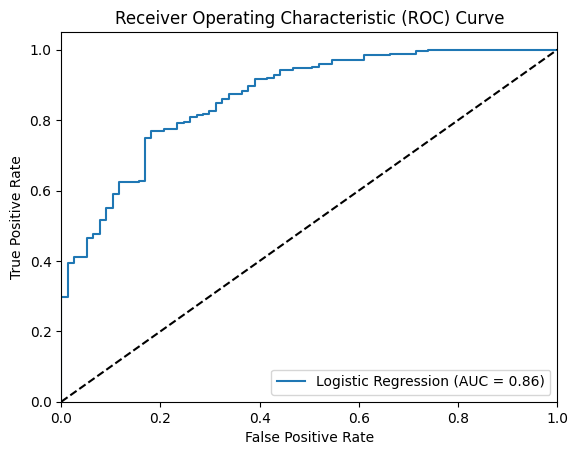

In [135]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Untuk Logistic Regression
y_pred_proba_lr = model_lr.predict_proba(X_test_lr)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Fitur Penting (Feature Importance)

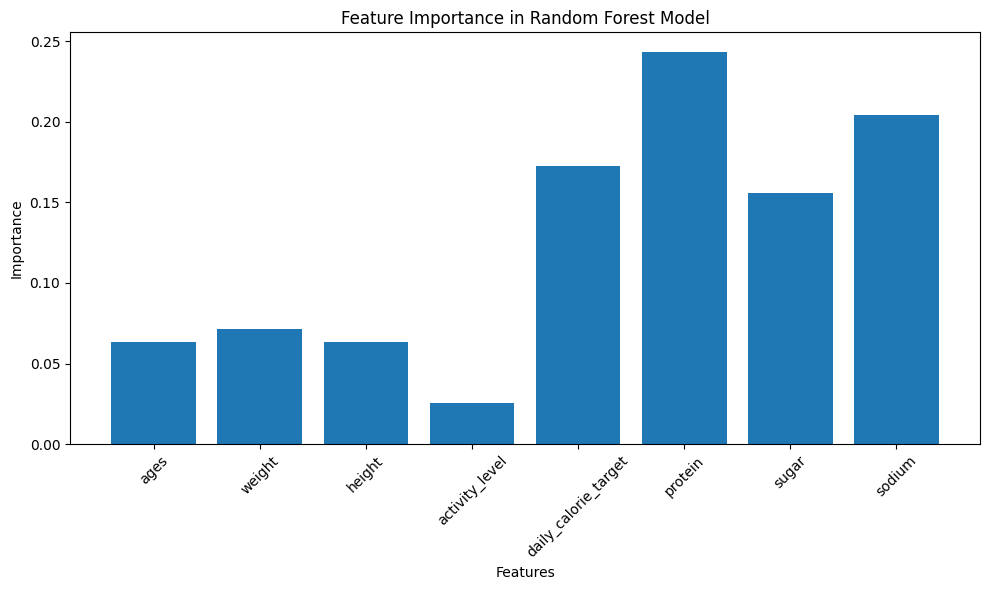

In [136]:
# Random Forest Feature Importance
feature_importances = model_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
